<a href="https://colab.research.google.com/github/kazimhsayed/Computational-Dynamics/blob/main/Assignment3Computational.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Flux conserving schemes, the total flux of interest is conserved helping in conservation of physical entities inside simulation like Mass, Momentum,Energy. They take into account flux at intermediary edges and conservation of this at each step conserves the quantity as a whole.

Total Variation Diminishing schemes and slope limiters are there to help dial down unwanted oscillaions that arise in higher order PDE solvers, the TVD help keep oscillations at bay by keeping the difference between two points smaller than it previously was, and is hence inclusive of diffusive schemes such as upwind, whereas slope limiters will retain the information about slope and discontinuities better.

##Donner Cell or Upwind

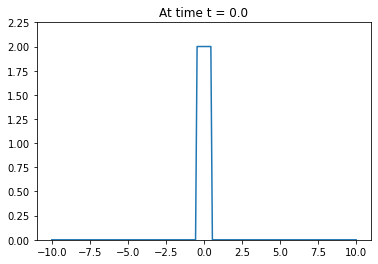

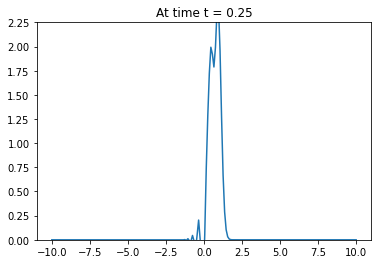

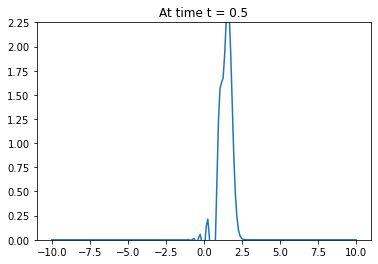

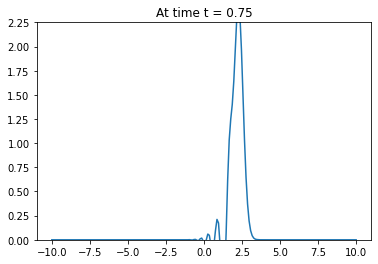

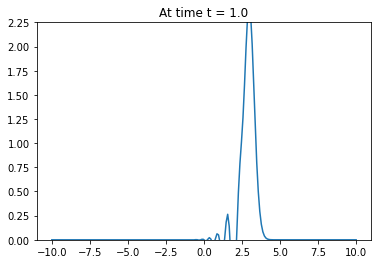

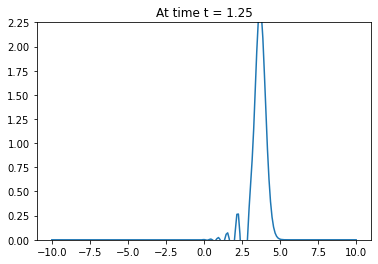

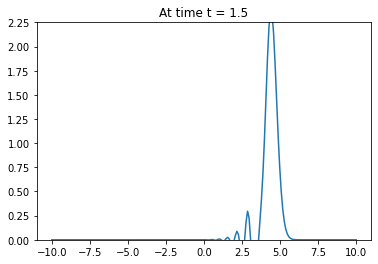

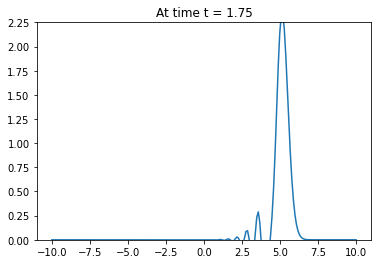

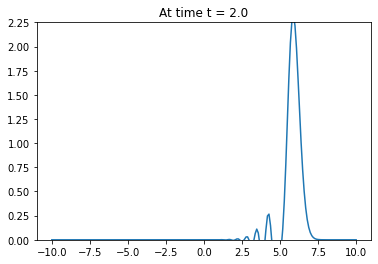

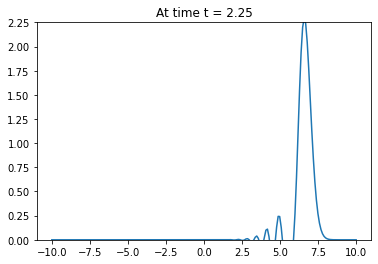

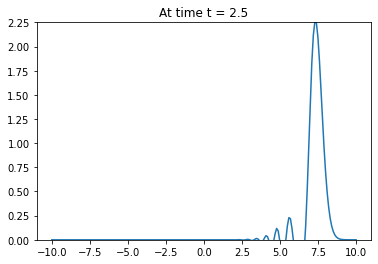

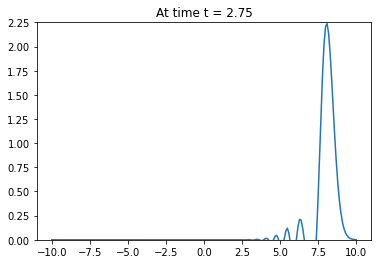

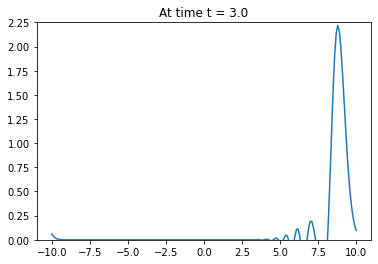

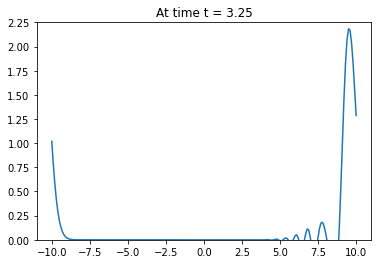

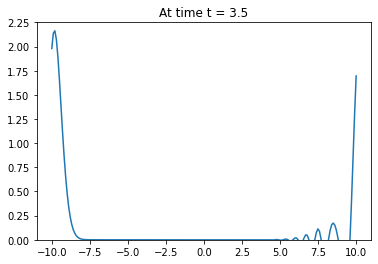

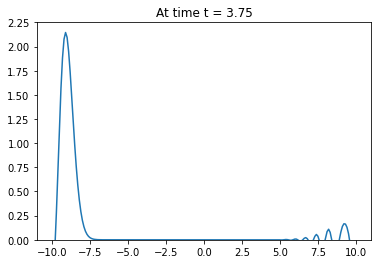

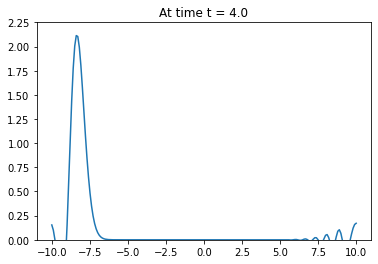

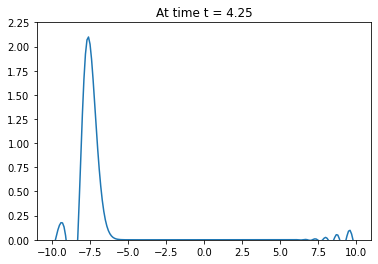

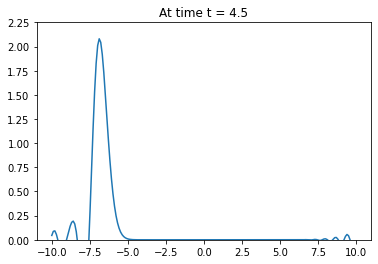

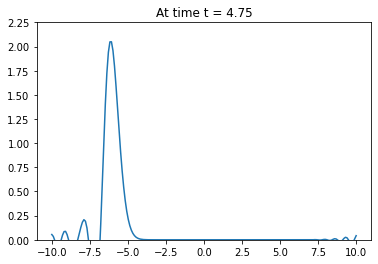

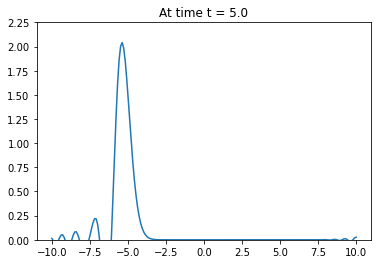

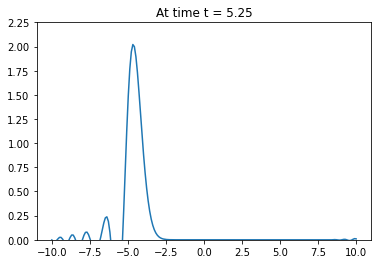

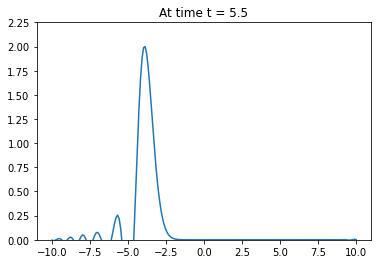

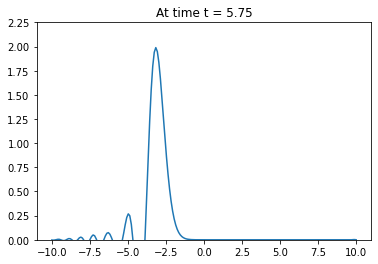

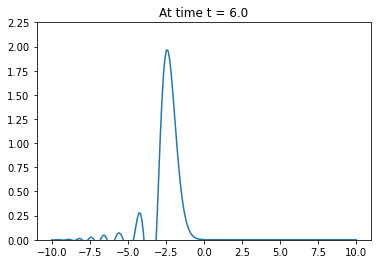

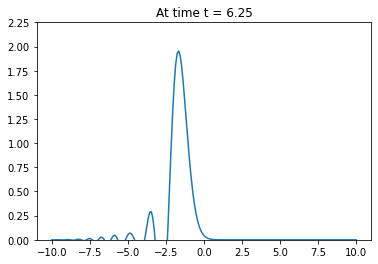

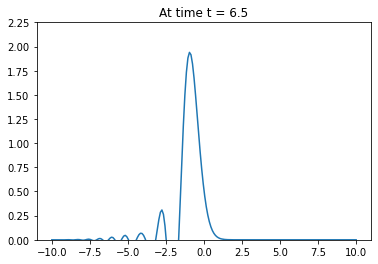

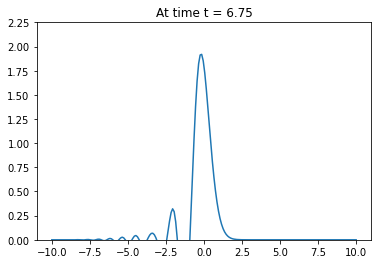

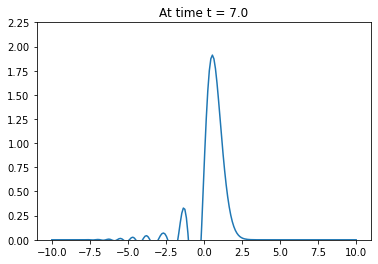

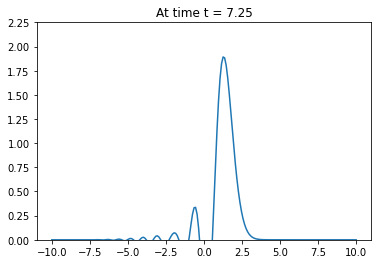

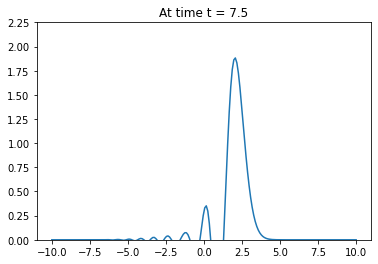

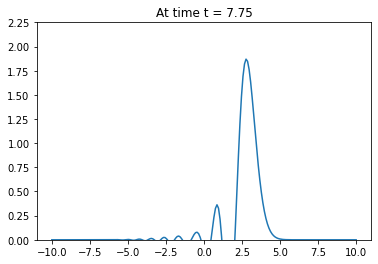

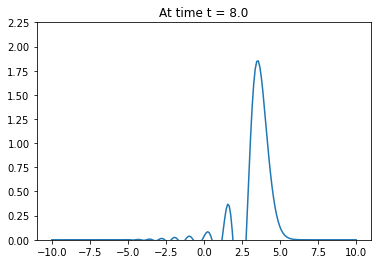

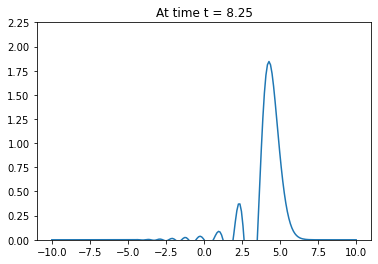

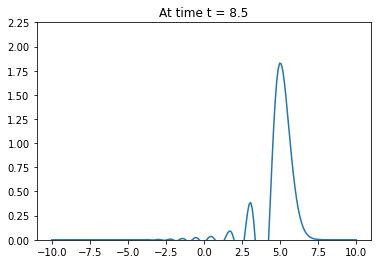

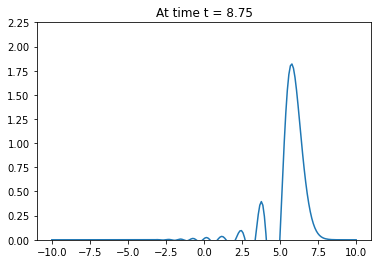

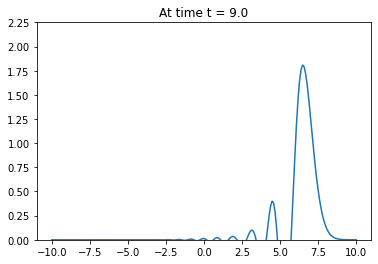

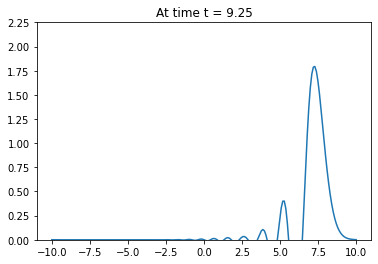

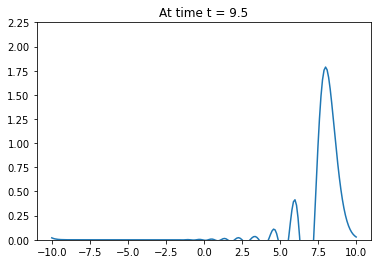

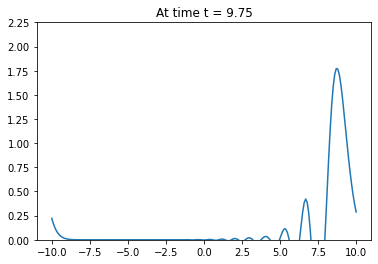

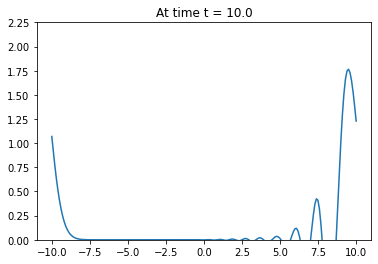

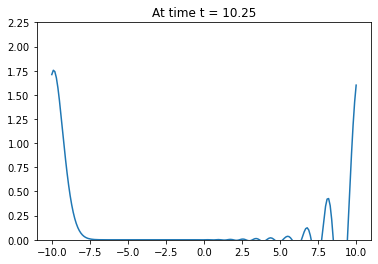

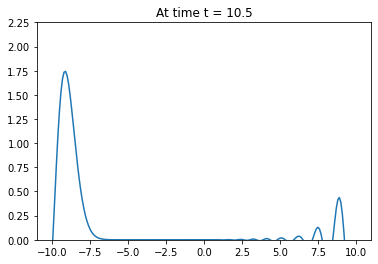

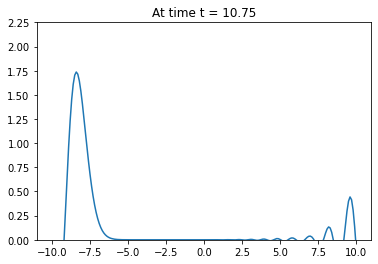

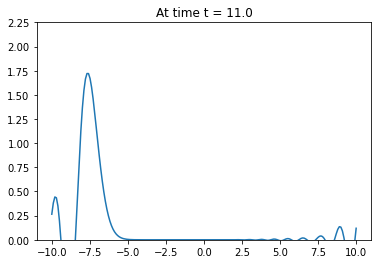

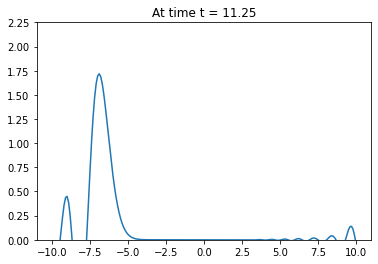

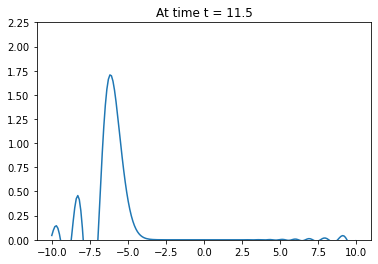

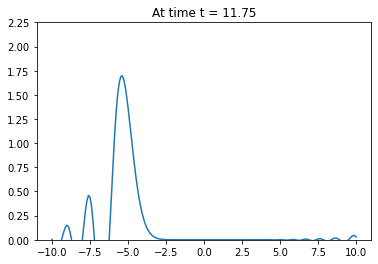

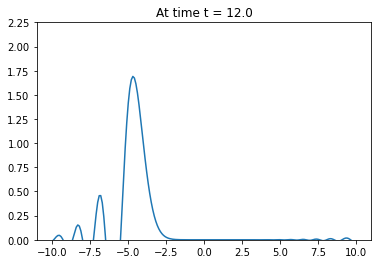

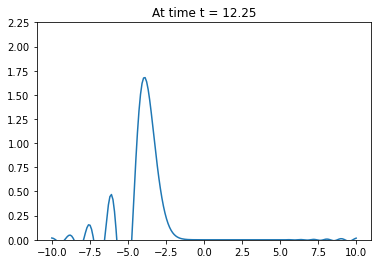

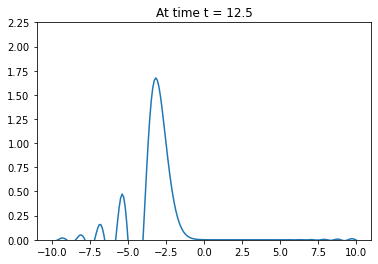

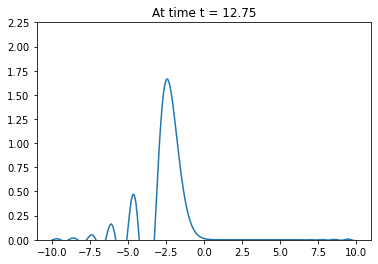

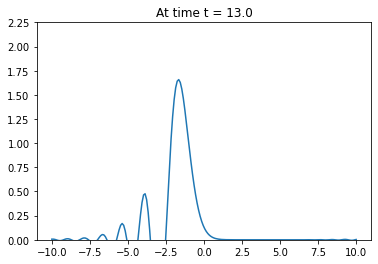

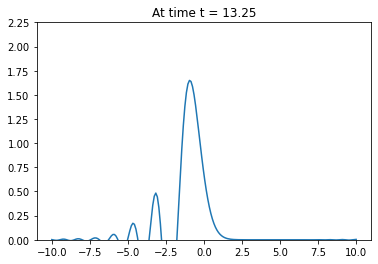

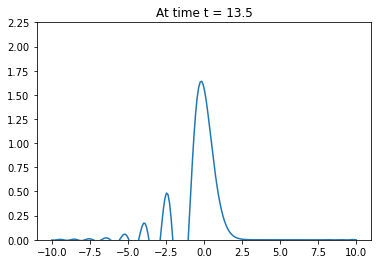

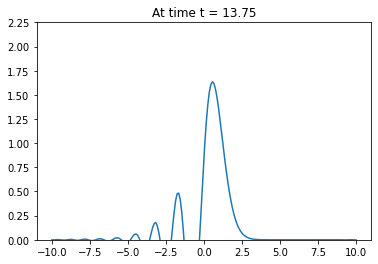

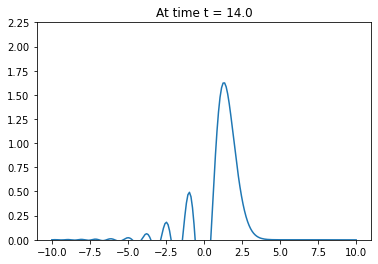

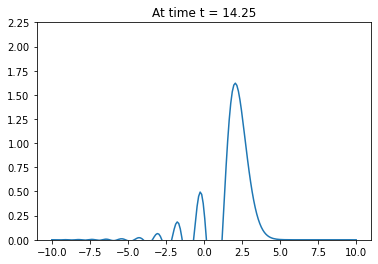

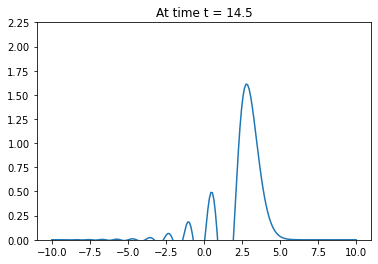

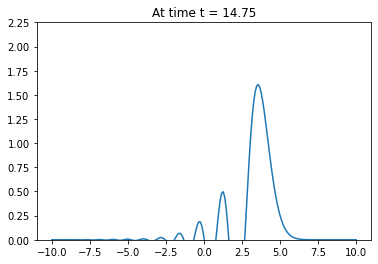

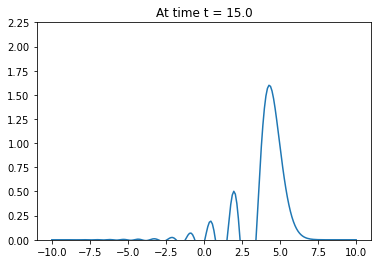

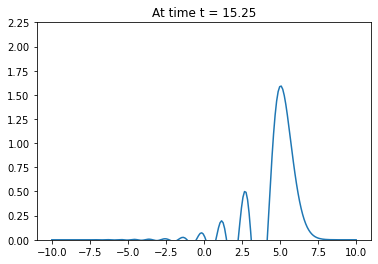

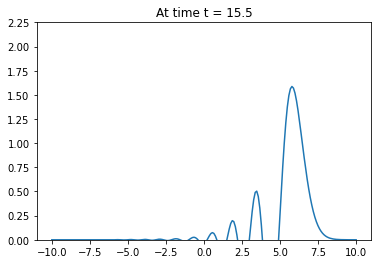

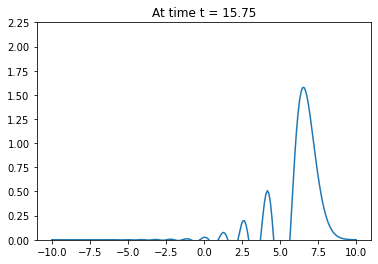

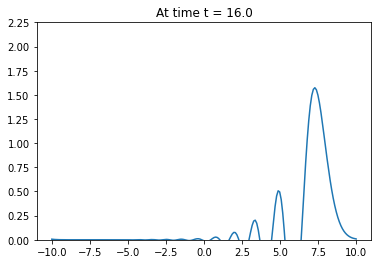

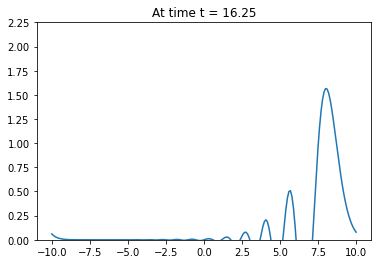

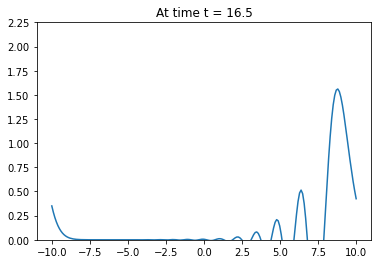

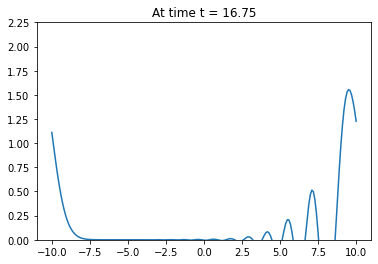

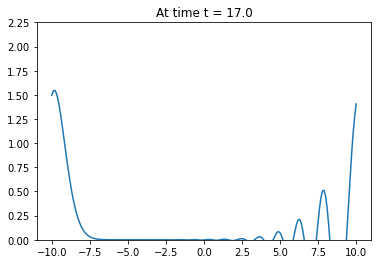

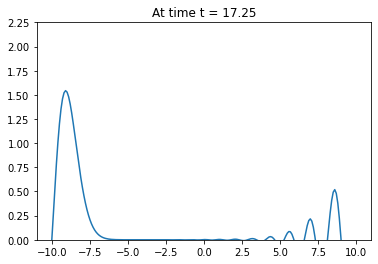

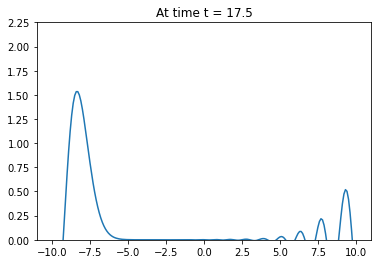

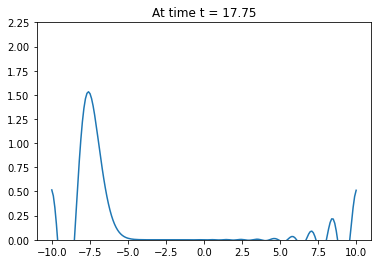

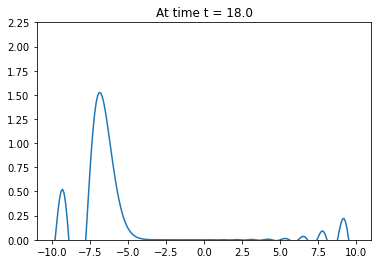

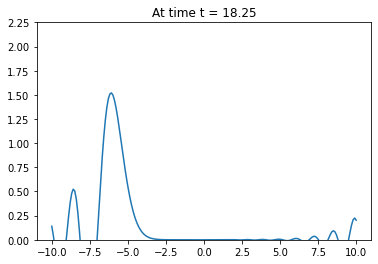

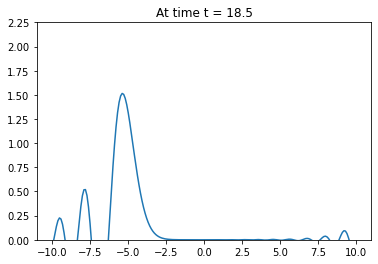

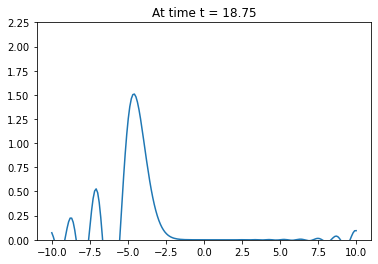

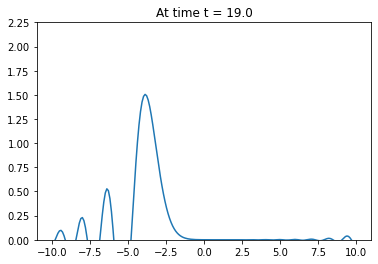

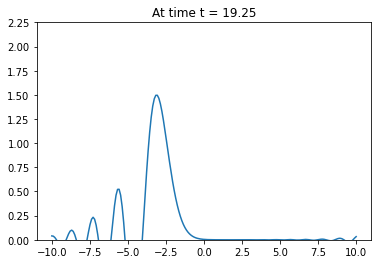

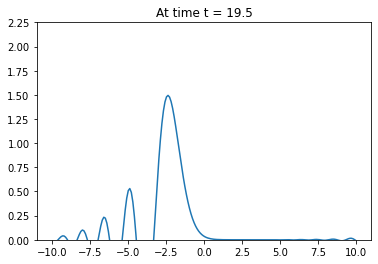

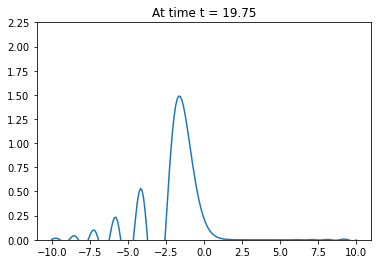

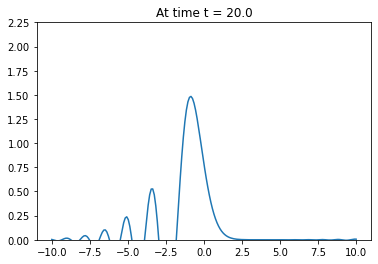

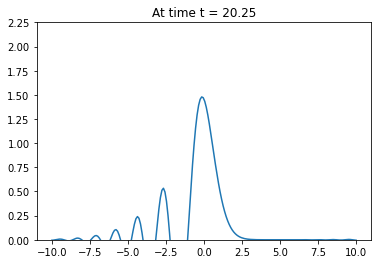

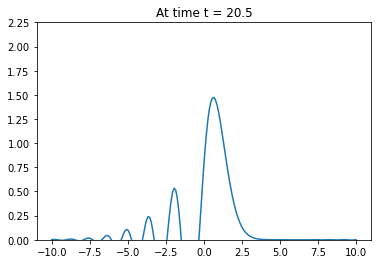

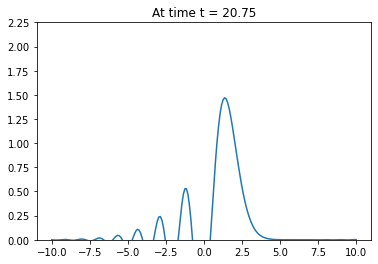

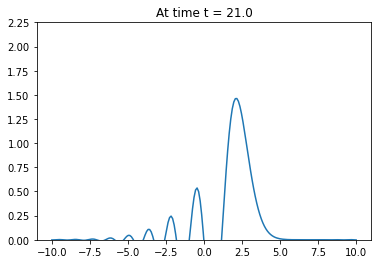

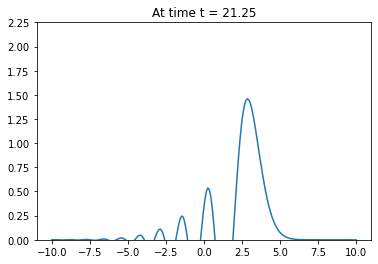

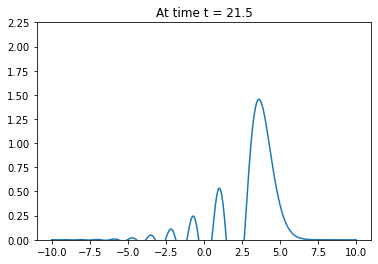

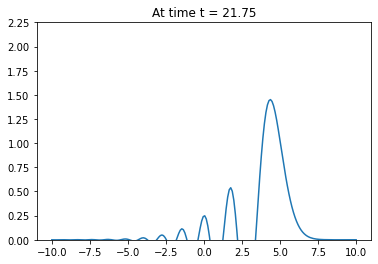

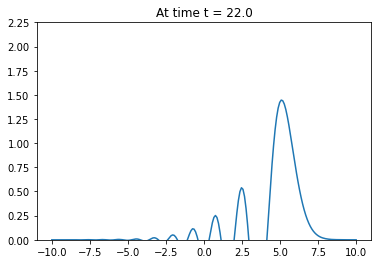

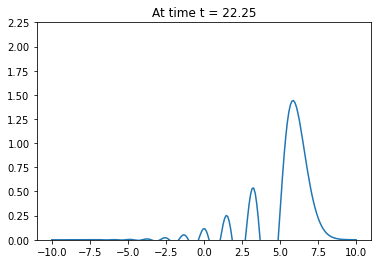

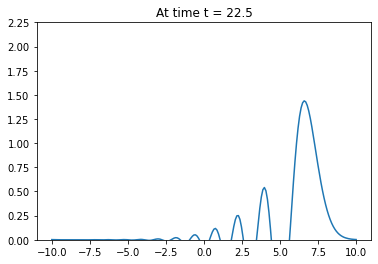

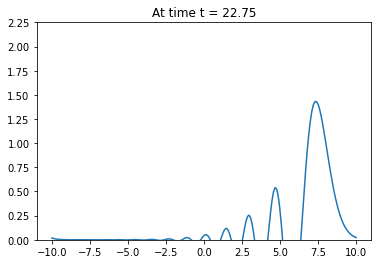

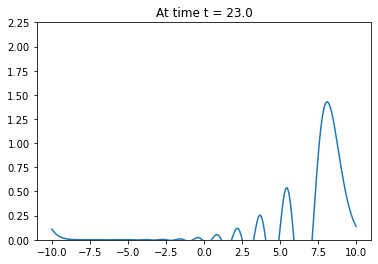

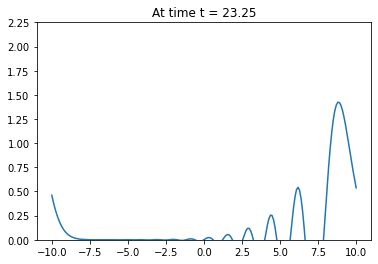

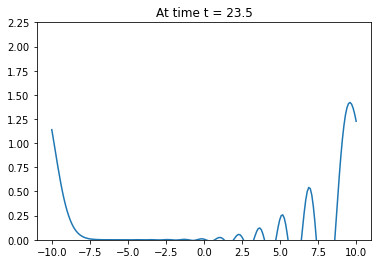

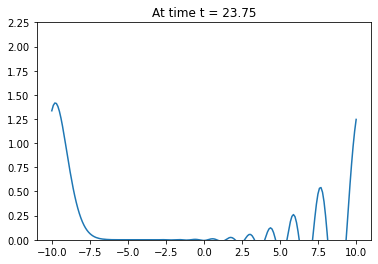

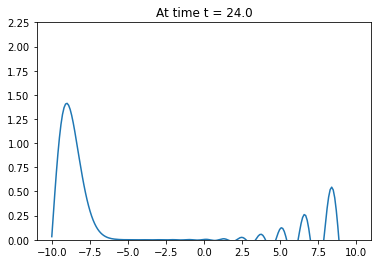

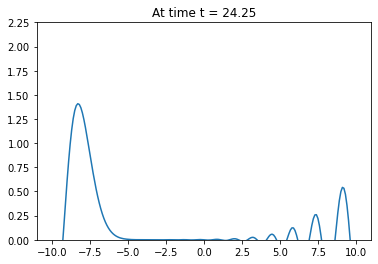

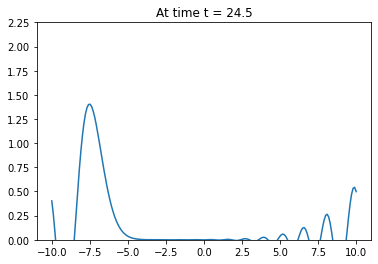

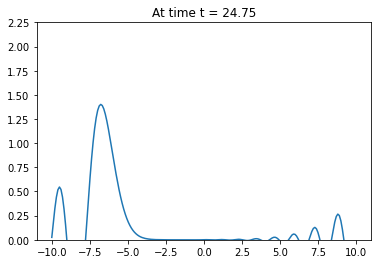

In [ ]:
#importing required libarries
import numpy as np
import matplotlib.pyplot as plt


#Creating Mesh of 200 grid points
Nx = 200
x_min , x_max = (-10, 10)
x = np.linspace(x_min, x_max, Nx)
dx = (x_max - x_min)/(Nx-1)

#Defining time for advection
t_min, t_max = (0, 25)
dt = 0.01 
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1)

#Constants
sigma = 1
lamb = 3.0
r = dt/dx



    
y = np.zeros(Nx)
for i in range(Nx):
  if -0.499 < x[i] < 0.501:
    y[i] = 2
  else:
    y[i]=0


q = np.zeros([Nt+1, Nx])
# u = np.zeros(Nt+1, Nx)
q[0, : ] = y
a = 1

for n in range(0, Nt):

  for i in range(1, Nx-1):
    f1 = 0.5*lamb*2*q[n,i-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,i] - q[n, i-1])
    f2 = 0.5*lamb*2*q[n,i] + 0.5*lamb*(1-r*lamb)*a*(q[n,i+1] - q[n, i])
    q[n+1,i] = q[n,i] + r*(f1 - f2)

  f1 = 0.5*lamb*2*q[n,Nx-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,0] - q[n, Nx-1])
  f2 = 0.5*lamb*2*q[n,0] + 0.5*lamb*(1-r*lamb)*a*(q[n,1] - q[n, 0])
  q[n+1,0] = q[n,0] + r*(f1 - f2)  

  f1 = 0.5*lamb*2*q[n,Nx-2] + 0.5*lamb*(1-r*lamb)*a*(q[n,Nx-1] - q[n, Nx-2])
  f2 = 0.5*lamb*2*q[n,Nx-1] + 0.5*lamb*(1-r*lamb)*a*(q[n,0] - q[n, Nx-1])
  q[n+1,Nx-1] = q[n,Nx-1] + r*(f1 - f2)    

  if n % 25 == 0:
    plt.plot(x, q[n])
    plt.title(f'At time t = {t[n]}')
    plt.ylim(0,2.25)
    plt.show()

```Problem 2```

## VANLEER Method for square pulse advection(Credits: Avinash Tiwary plus team(includi)

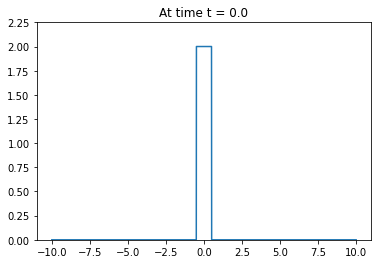

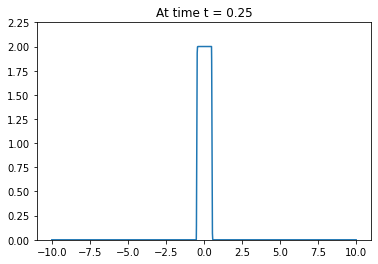

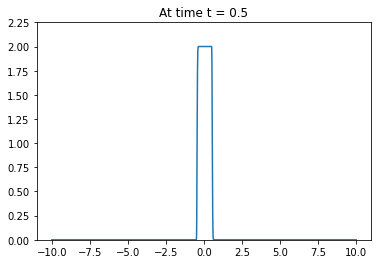

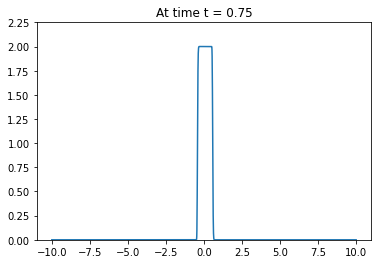

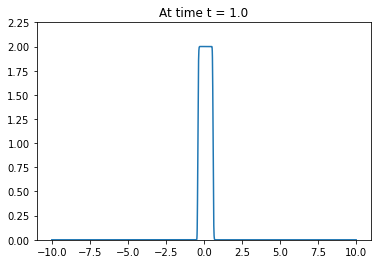

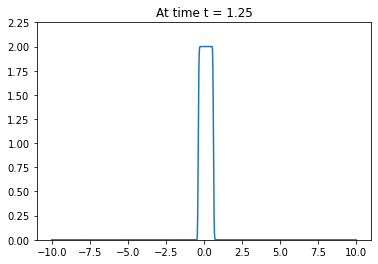

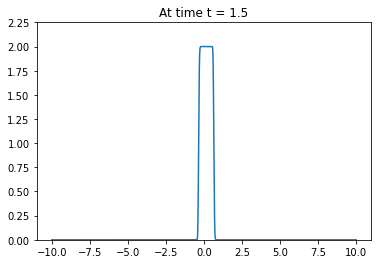

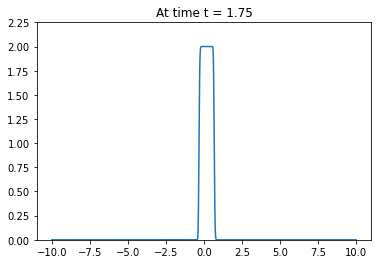

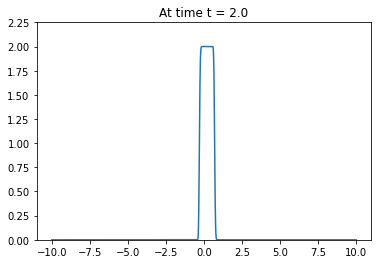

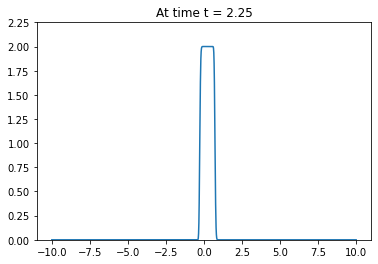

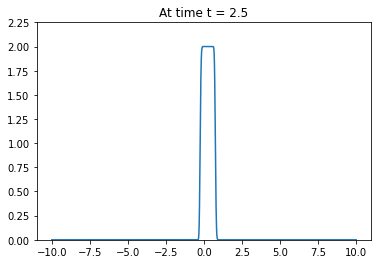

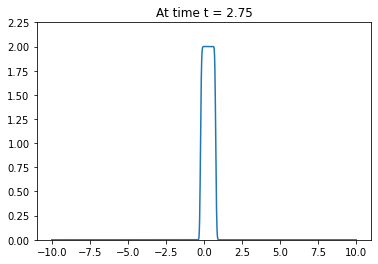

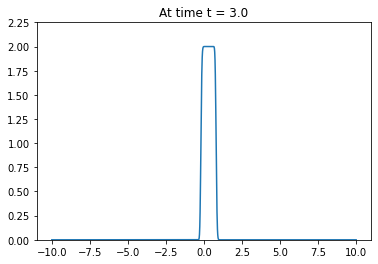

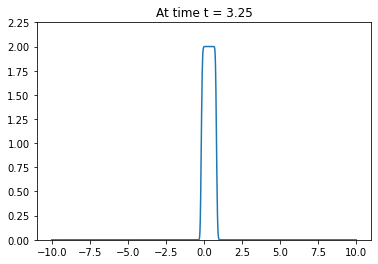

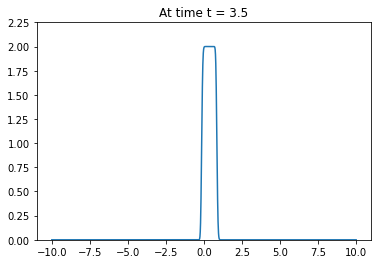

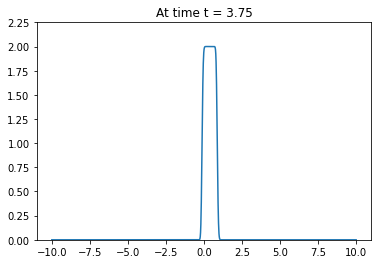

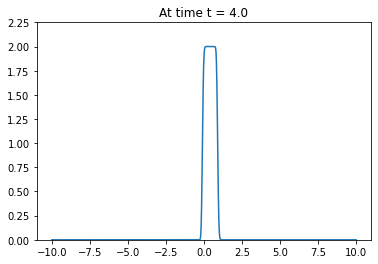

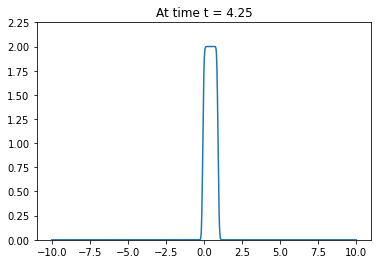

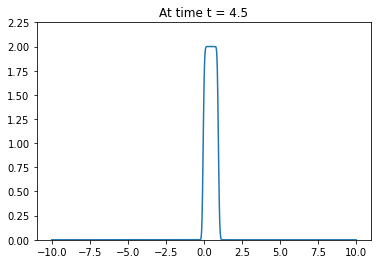

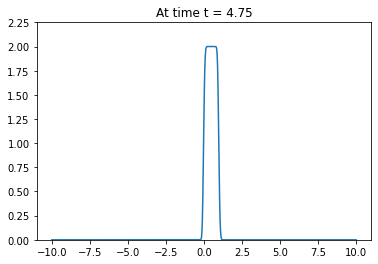

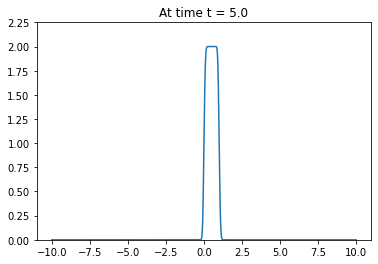

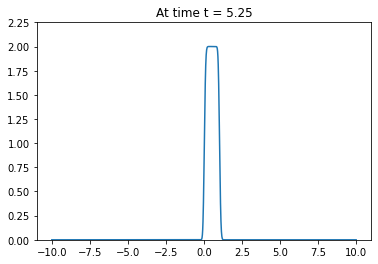

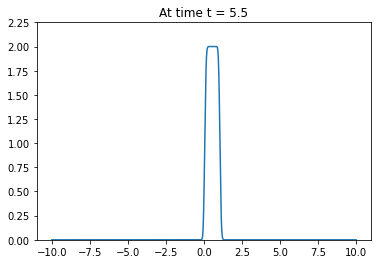

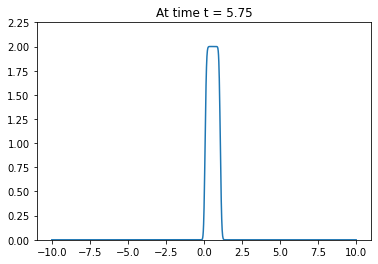

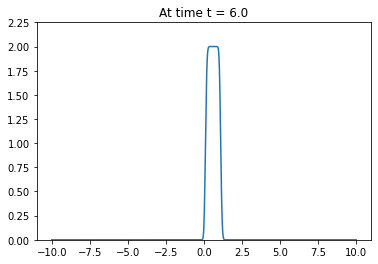

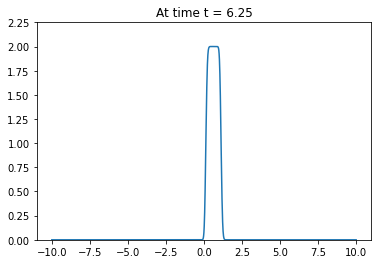

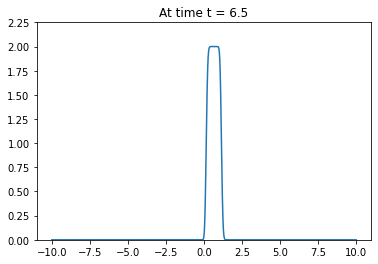

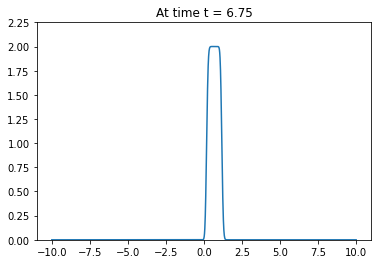

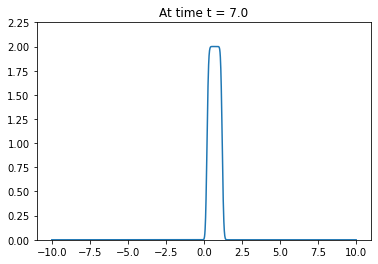

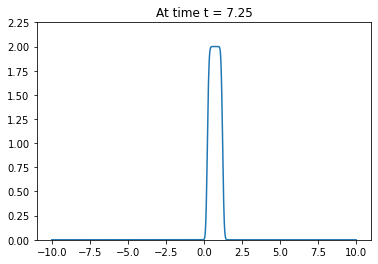

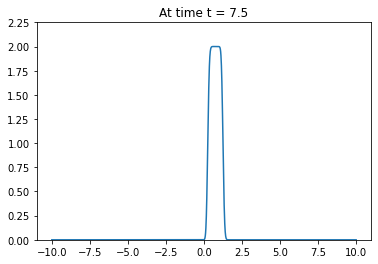

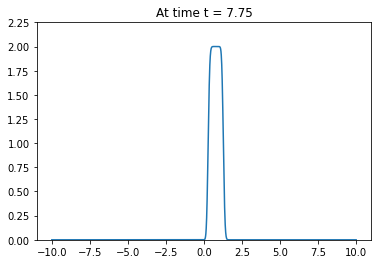

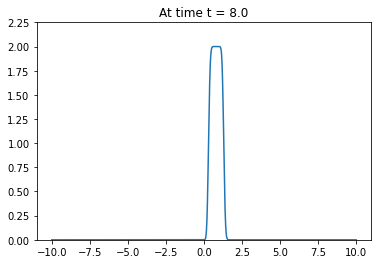

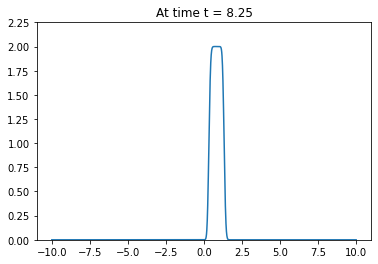

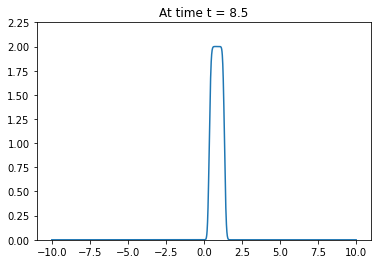

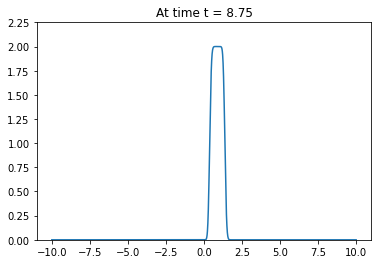

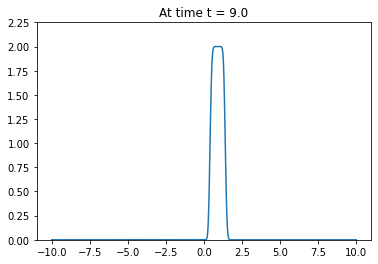

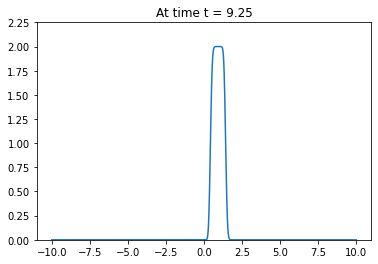

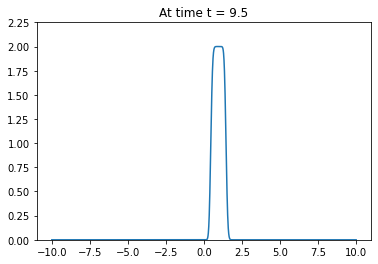

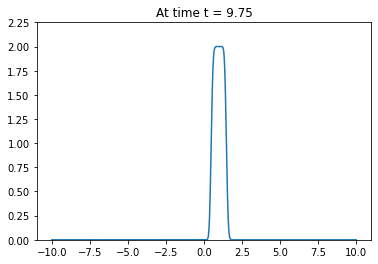

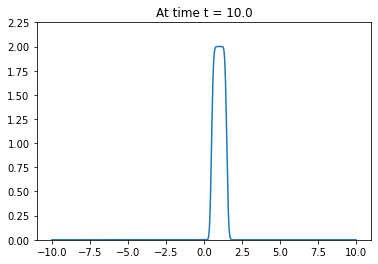

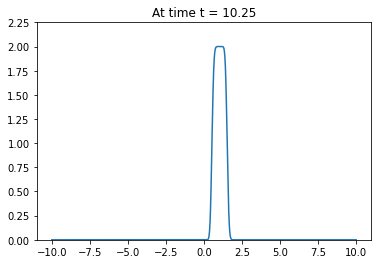

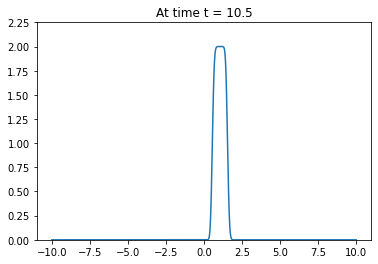

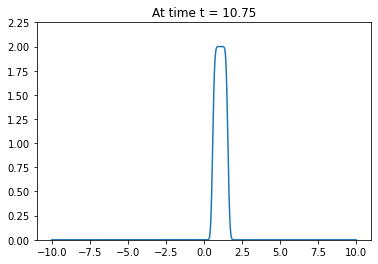

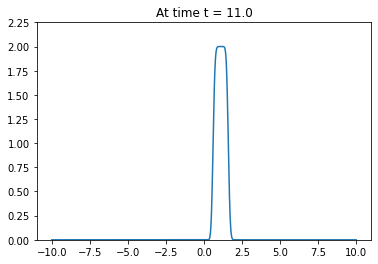

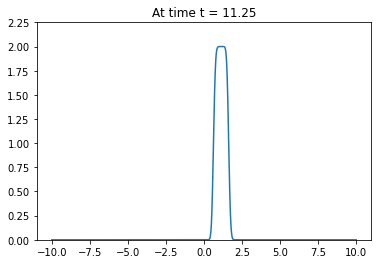

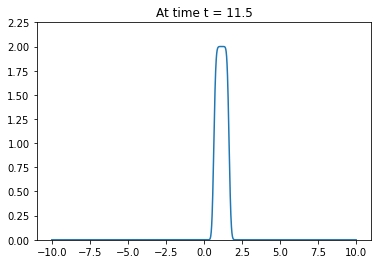

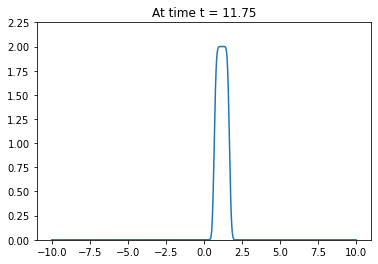

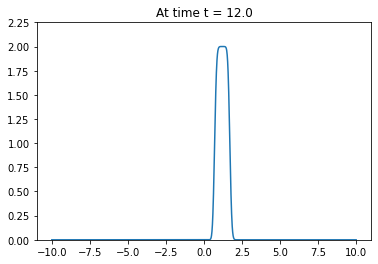

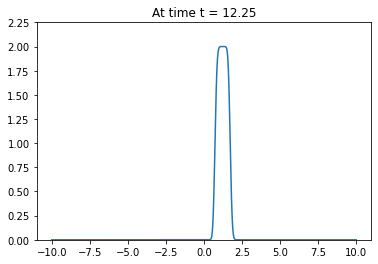

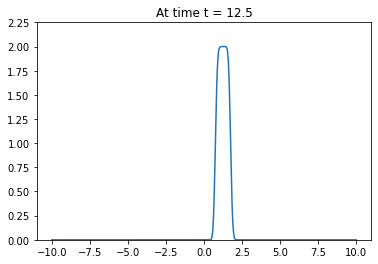

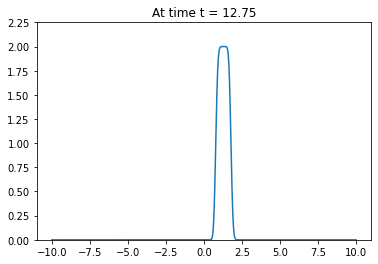

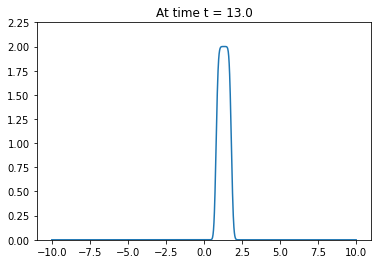

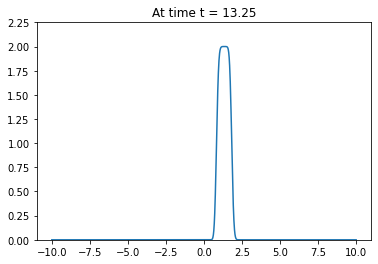

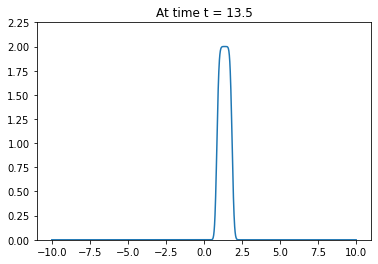

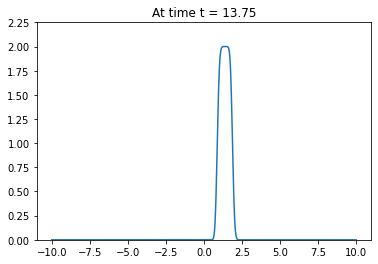

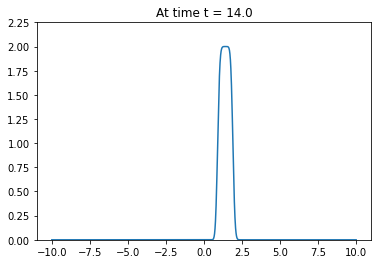

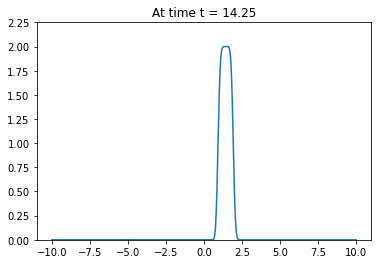

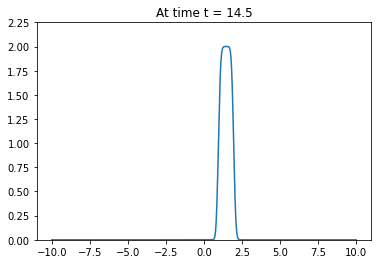

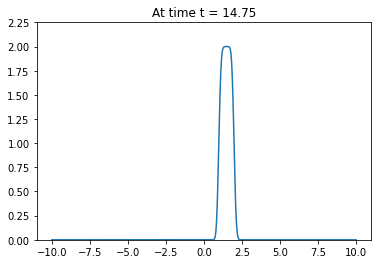

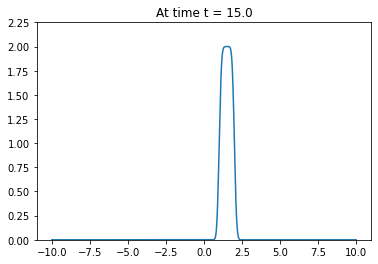

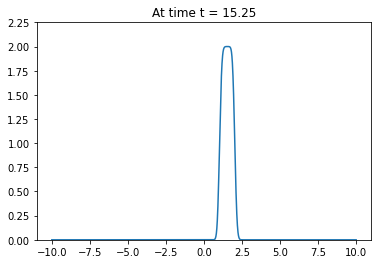

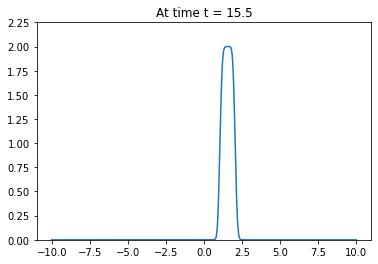

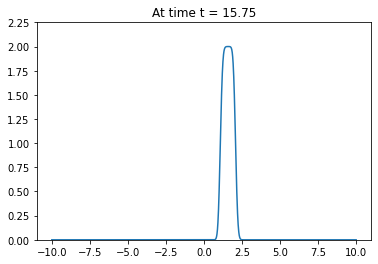

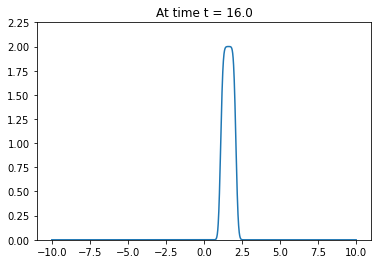

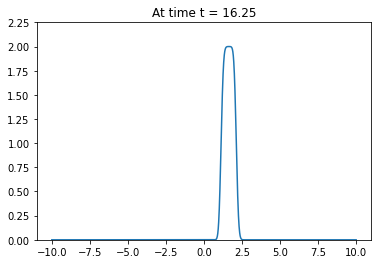

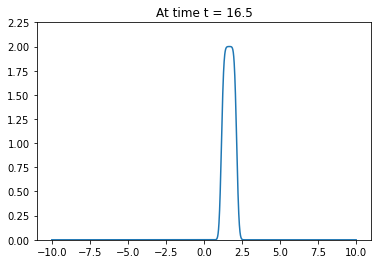

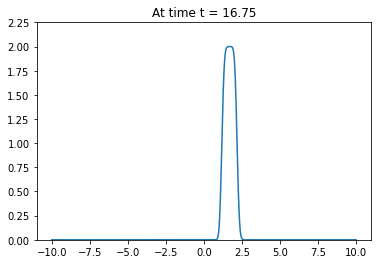

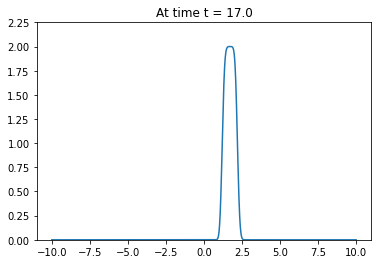

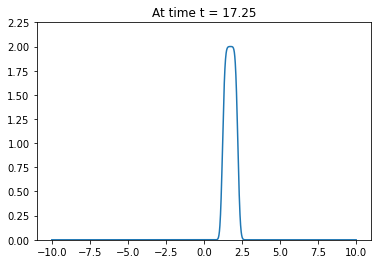

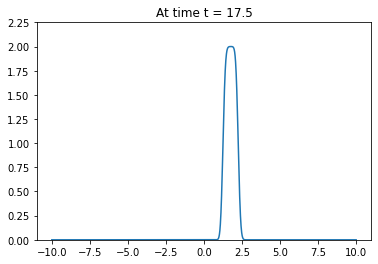

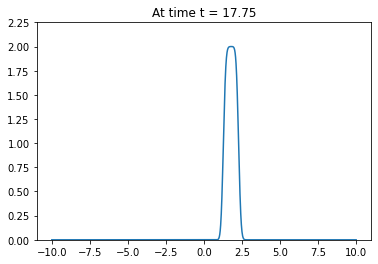

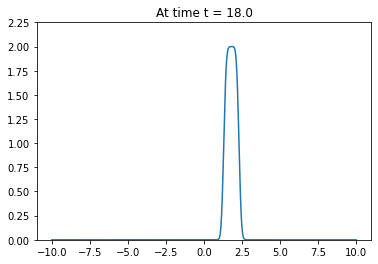

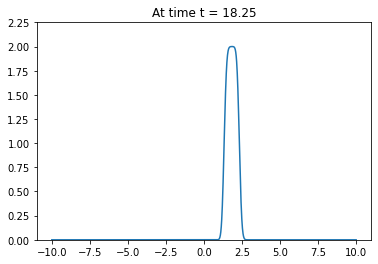

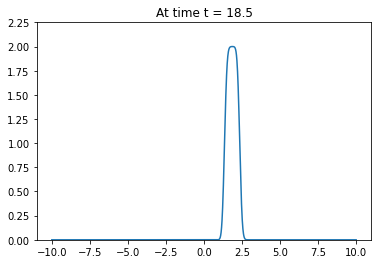

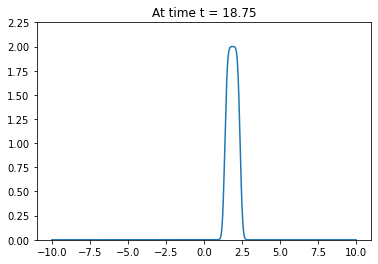

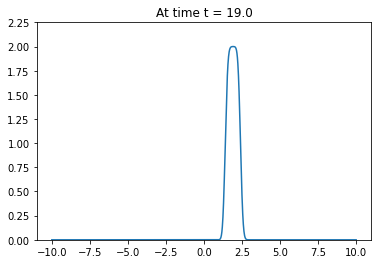

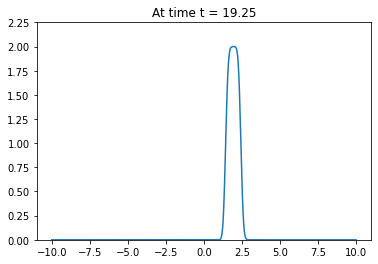

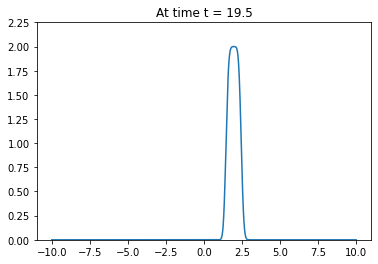

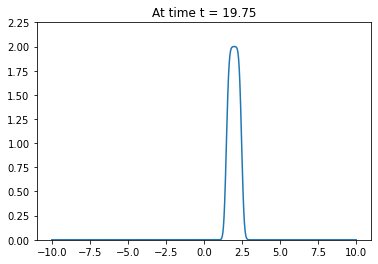

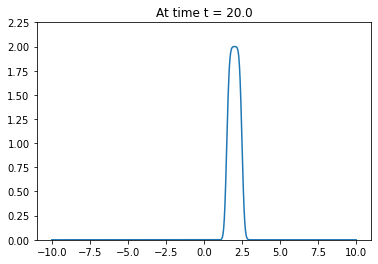

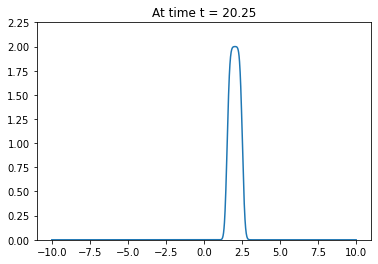

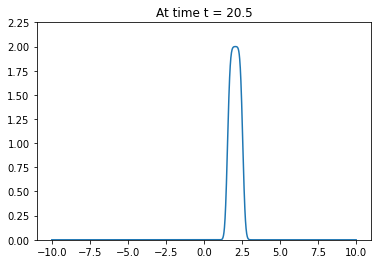

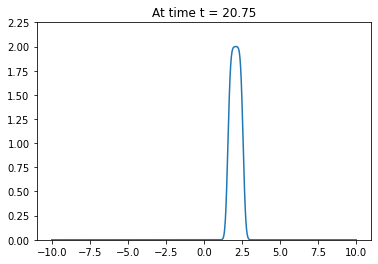

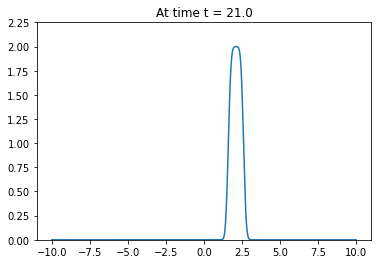

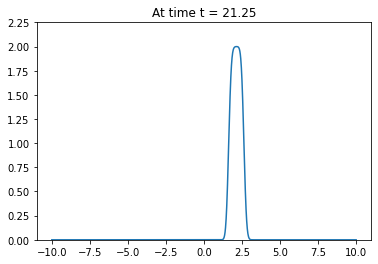

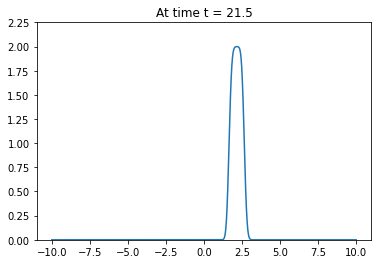

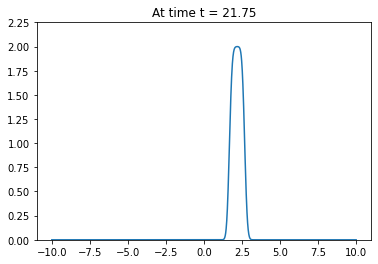

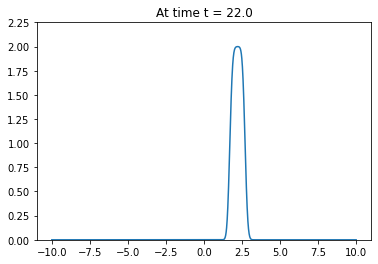

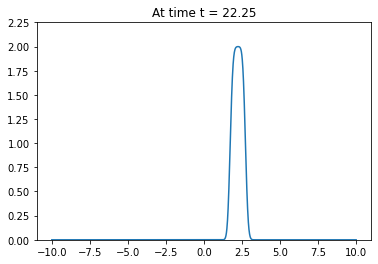

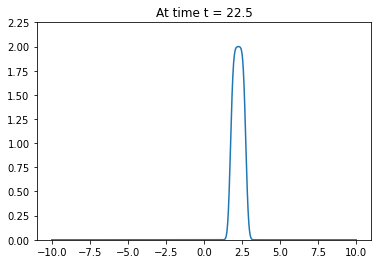

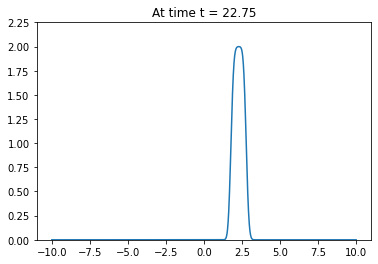

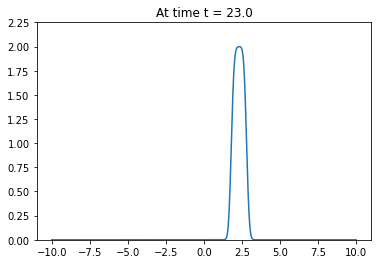

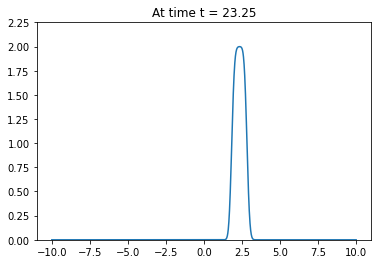

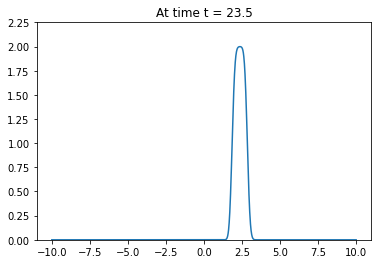

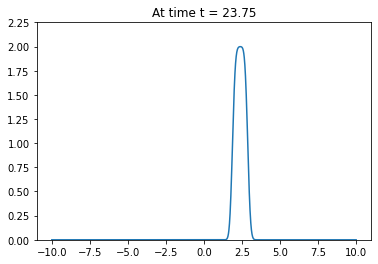

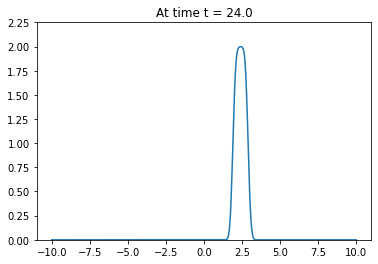

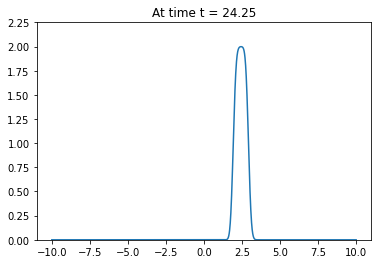

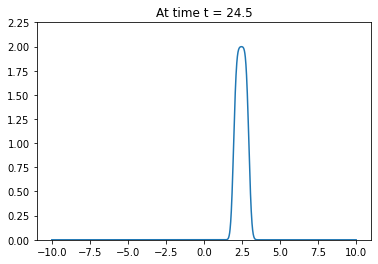

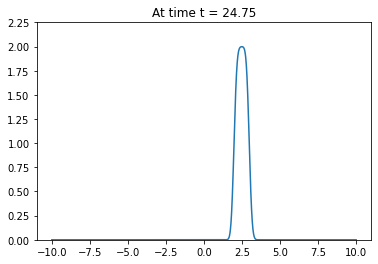

In [ ]:
#importing required libarries
import numpy as np
import matplotlib.pyplot as plt

#Creating interface for Cells and Cell centers
Nx = 2000
x_min , x_max = (-10, 10)

#defining cell Interface as x_int
x_int = np.linspace(x_min, x_max, Nx+1, endpoint = True)

#defining cell center as x
x = np.zeros(Nx)
dx = np.zeros(Nx)
for i in range(Nx):
  x[i] = 0.5*(x_int[i] + x_int[i+1])
  dx[i] = x_int[i+1] - x_int[i]


#Defining time for advection
t_min, t_max = (0, 25)
dt = 0.01
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1, endpoint=True)

#defining square pulse:
sq_pulse = 2*(abs(x) <= 0.5)

q = np.zeros([Nt+1, Nx])
sigma = np.zeros([Nt+1, Nx])
u = np.ones([Nt+1, Nx])*10

q[0, :] = sq_pulse


for n in range(Nt):

  for i in range(1, Nx-1):


    # u[n,:] = 0.25*(q[n,:]+q[n+1])

    if u[n,i] >= 0:
      theta1 = 1
      if (q[n,i]-q[n,i-1]) ==0:
        r1=0
      else:
        r1 = (q[n,i-1]-q[n,i-2])/(q[n,i]-q[n,i-1])
    else:
      if (q[n,i]-q[n,i-1]) ==0:
        r1=0
      else:
        r1 = (q[n,i+1]+q[n,i])/(q[n,i]-q[n,i-1])
      theta1 = -1

    if u[n,i+1] >= 0:
      if (q[n,i+1]-q[n,i]) ==0:
        r2=0
      else:
        r2 = (q[n,i]-q[n,i-1])/(q[n,i+1]-q[n,i])
      theta2 = 1
    else:
      if (q[n,i+1]-q[n,i]) ==0:
        r2=0
      else:
        if i == Nx-2:
          r2 = (q[n,0]+q[n,i+1])/(q[n,i+1]-q[n,i])  
        else:
          r2 = (q[n,i+2]+q[n,i+1])/(q[n,i+1]-q[n,i])
      theta2 = -1
    


    f1 = 0.5*u[n,i]*((1 + theta1)*q[n,i-1] + (1-theta1)*q[n,i]) + 0*0.25*abs(u[n,i])*(1 - abs(u[n,i]*dt/dx[i]))*dx[i]*((1+theta1)*sigma[n,i-1] + (1-theta1)*sigma[n,i])
    f2 = 0.5*u[n,i+1]*((1 + theta2)*q[n,i] + (1-theta2)*q[n,i+1]) + 0*0.25*abs(u[n,i+1])*(1 - abs(u[n,i+1]*dt/dx[i]))*dx[i]*((1+theta1)*sigma[n,i] + (1-theta1)*sigma[n,i+1])


    # f1 = 0.5*u[n,i]*((1 + theta1)*q[n,i-1] + (1-theta1)*q[n,i]) + 0.5*abs(u[n,i])*(1 - abs(u[n,i]*dt/dx[i]))*((r1+abs(r1))/(1+abs(r1)))*(q[n,i]-q[n,i-1])
    # f2 = 0.5*u[n,i+1]*((1 + theta2)*q[n,i] + (1-theta2)*q[n,i+1]) + 0.5*abs(u[n,i+1])*(1 - abs(u[n,i+1]*dt/dx[i]))*((r2+abs(r2))/(1+abs(r2)))*(q[n,i]-q[n,i-1])
    q[n+1,i] = q[n,i] + (100*dt*dx[i])*(f1 - f2)


  if n % 25 == 0:
    plt.plot(x, q[n])
    plt.title(f'At time t = {t[n]}')
    plt.ylim(0,2.25)
    # plt.xlim(-2.1, 2.1)
    plt.show()

Deleted first miserable try at all methods(below), Requesting more time to complete if possible

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''The Independent variables'''
x_initial = -10
x_final = 10
N = 200
x = np.linspace(x_initial,x_final,N)
h = x[1]-x[0]


t_initial = 0
t_final = 25
dt = 0.01
M = int((t_final-t_initial)/dt)
t = np.linspace(t_initial,t_final,M)
dt = t[1]-t[0]

'''Empty 2-D arrays for Solutions'''
u_analytic = np.zeros([len(x),len(t)])
u_donner_cell = np.zeros([len(x),len(t)])
u_laxwendroff = np.zeros([len(x),len(t)])
u_Beam-Warming = np.zeros([len(x),len(t)])
u_Fromm = np.zeros([len(x),len(t)])
u_minmod = np.zeros([len(x),len(t)])
u_Superbee = np.zeros([len(x),len(t)])
u_MC = np.zeros([len(x),len(t)])
u_van_leer = np.zeros([len(x),len(t)])


'''Values for the function and defining the Analytic function that moves periodically with time'''





width_square_pulse=0.5
height_square_pulse=2


lambdaa=height_square_pulse        #Enter Lambda or Velocity here
def analytic(t,x):
    while x-lambdaa*t<x_initial:
      x=x+(x_final-x_initial)
    while x - lambdaa*t>x_final:
      x=x-(x_final-x_initial)
    y=0
    if np.abs(x-lambdaa*t)<width_square_pulse:
      y=height_square_pulse
    return y



'''Setting the Initial Conditions'''

for i in range(0,N):
  u_analytic[i,0] = analytic(t[0],x[i])



u_donner_cell[:,0] = u_analytic[:,0]
u_laxwendroff[:,0] = u_analytic[:,0]
u_Beam-Warming[:,0] = u_analytic[:,0]
u_Fromm[:,0] = u_analytic[:,0]
u_minmod[:,0] = u_analytic[:,0]
u_Superbee[:,0] = u_analytic[:,0]
u_MC[:,0] = u_analytic[:,0]
u_van_leer[:,0] = u_analytic[:,0]






for n in range(0,M-1):
    
    for i in range (0,N):
        u_analytic[i,n+1] = analytic(t[n+1],x[i])


        j=i-1
        k=i+1
        if j<0:
          j=N-1
        if k>N-1:
          k=0

